# Single Tail vs Double Tail

## Single Tail

## Double Tail

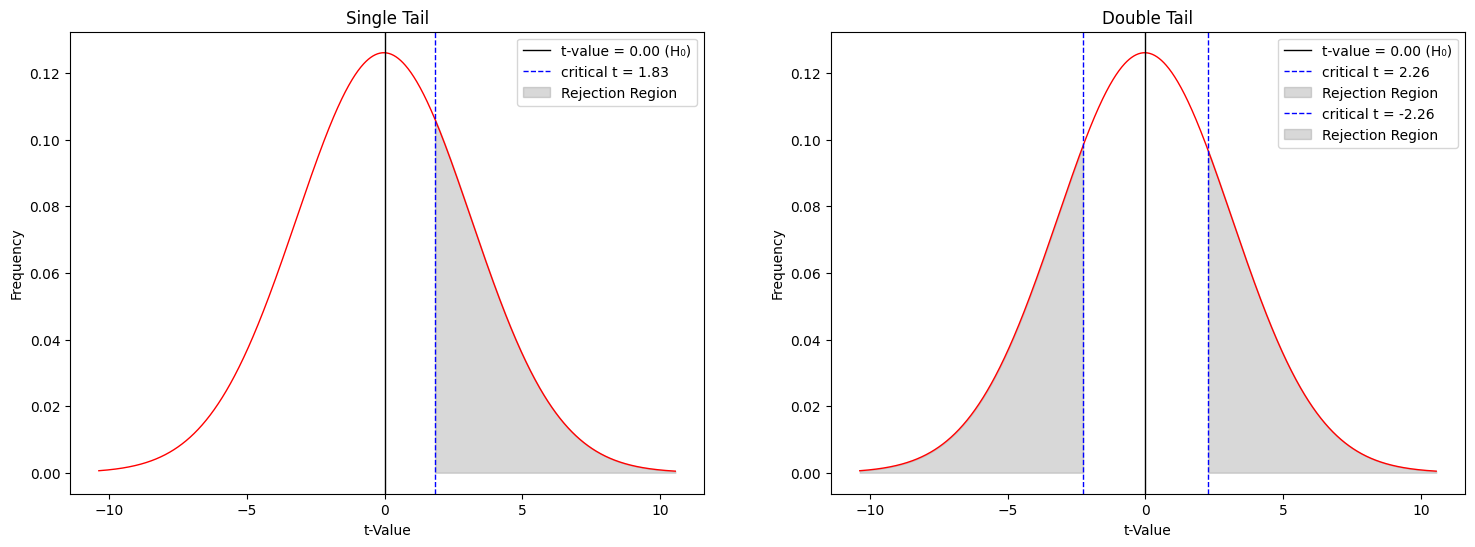

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
from scipy import stats

data = np.random.normal(loc=20000, scale=3000, size=5000)
null_mean = np.mean(data)

sample_means = []
observed_mean = 21403.50 # ave annual profit of specific ice cream shop
n = 10 # sample size
for i in range(1000):
    mean = 0
    for i in range(10):
        mean += np.random.choice(data)
    mean = mean/10
    sample_means.append(mean)

# take t-values
tvalues = []
std = np.std(sample_means) # sample standard deviation
SE = std/(math.sqrt(10))
for i, value in enumerate(sample_means):
    t = (sample_means[i] - null_mean)/(SE)
    tvalues.append(t)
x = np.linspace(min(tvalues), max(tvalues), 1000)
p = norm.pdf(x, np.mean(tvalues), np.std(tvalues))

single_alpha = 0.05
df = n - 1
s_critical_value = stats.t.ppf(1 - single_alpha, df=df)

plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
plt.plot(x, p, 'r', linewidth=1)
null_t = (null_mean - null_mean)/(SE)
plt.axvline(null_t, color='black', linestyle='-', linewidth=1, label=f't-value = {null_t:.2f} (H₀)')
plt.axvline(s_critical_value, color='blue', linestyle='--', linewidth=1, label=f'critical t = {s_critical_value:.2f}')
plt.fill_between(x, 0, p, where=(x >= s_critical_value), color='grey', alpha=0.3, label='Rejection Region')
plt.title('Single Tail')
plt.xlabel('t-Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

double_alpha = 0.05/2
df = n - 1
d_critical_value = stats.t.ppf(1 - double_alpha, df=df)

plt.subplot(1,2,2)
plt.plot(x, p, 'r', linewidth=1)
plt.axvline(null_t, color='black', linestyle='-', linewidth=1, label=f't-value = {null_t:.2f} (H₀)')
plt.axvline(d_critical_value, color='blue', linestyle='--', linewidth=1, label=f'critical t = {d_critical_value:.2f}')
plt.fill_between(x, 0, p, where=(x >= d_critical_value), color='grey', alpha=0.3, label='Rejection Region')
plt.axvline(-d_critical_value, color='blue', linestyle='--', linewidth=1, label=f'critical t = {-d_critical_value:.2f}')
plt.fill_between(x, 0, p, where=(x <= -d_critical_value), color='grey', alpha=0.3, label='Rejection Region')
plt.title('Double Tail')
plt.xlabel('t-Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')